<h1><center> 💝 Breast Cancer Prediction Using Machine Learning
 </center> </h1>


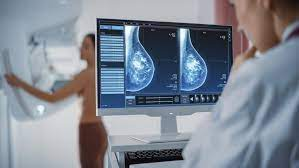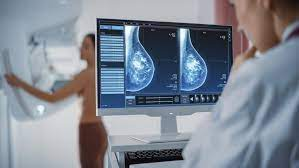

# 1 Problem Statement: Breast Cancer Survival Prediction


### 1.1 Description:

• Breast cancer is a type of cancer that starts in the breast. It is the most common
cancer in women, after skin cancer. Breast cancer can occur in men, but it is
much less common.

• Breast cancer starts when cells in the breast grow out of control. These cells
form a tumor. The tumor can be either benign or malignant. Benign tumors are
not cancerous. Malignant tumors are cancerous.

• Malignant breast tumors can spread to other parts of the body, such as the bones,
liver, and lungs. This is called metastasis.

## 2 1. Importing Libraries


In [ ]:
import pickle
import warnings
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import Machine Learning Models

In [105]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

# Check the Model Accuracy, Errors and it's Validations

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.metrics import classification_report

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.svm import SVC

from sklearn import metrics

## 3 2. Dataset Information


In [12]:
df = pd.read_csv("data.csv")

df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

<ul>
  <li><strong>'id':</strong> Unique identifier for each data entry.</li>
  <li><strong>'diagnosis':</strong> Binary classification of tumor as malignant (M) or benign (B).</li>
  <li><strong>'radius_mean':</strong> Mean of the distances from the center to points on the perimeter.</li>
  <li><strong>'texture_mean':</strong> Standard deviation of gray-scale values in the image.</li>
  <li><strong>'perimeter_mean':</strong> Mean of the tumor's boundary length.</li>
  <li><strong>'area_mean':</strong> Mean of the tumor's area.</li>
  <li><strong>'smoothness_mean':</strong> Mean of local variation in radius lengths.</li>
  <li><strong>'compactness_mean':</strong> Mean of perimeter^2 / area - 1.0.</li>
  <li><strong>'concavity_mean':</strong> Mean of severity of concave portions of the contour.</li>
  <li><strong>'concave points_mean':</strong> Mean for the number of concave portions of the contour.</li>
  <li><strong>'symmetry_mean':</strong> Mean symmetry of the tumor.</li>
  <li><strong>'fractal_dimension_mean':</strong> Mean "coastline approximation" - 1.</li>
  <li><strong>'radius_se':</strong> Standard error of the mean of distances from center to points on the perimeter.</li>
  <li><strong>'texture_se':</strong> Standard error of gray-scale values.</li>
  <li><strong>'perimeter_se':</strong> Standard error of tumor's boundary length.</li>
  <li><strong>'area_se':</strong> Standard error of tumor's area.</li>
  <li><strong>'smoothness_se':</strong> Standard error of local variation in radius lengths.</li>
  <li><strong>'compactness_se':</strong> Standard error of perimeter^2 / area - 1.0.</li>
  <li><strong>'concavity_se':</strong> Standard error of severity of concave portions of the contour.</li>
  <li><strong>'concave points_se':</strong> Standard error for the number of concave portions of the contour.</li>
  <li><strong>'symmetry_se':</strong> Standard error of tumor's symmetry.</li>
  <li><strong>'fractal_dimension_se':</strong> Standard error of "coastline approximation" - 1.</li>
  <li><strong>'radius_worst':</strong> Worst or largest mean value of distances from center to points on the perimeter.</li>
  <li><strong>'texture_worst':</strong> Worst or largest standard deviation of gray-scale values.</li>
  <li><strong>'perimeter_worst':</strong> Worst or largest mean value of tumor's boundary length.</li>
  <li><strong>'area_worst':</strong> Worst or largest mean value of tumor's area.</li>
  <li><strong>'smoothness_worst':</strong> Worst or largest mean value of local variation in radius lengths.</li>
  <li><strong>'compactness_worst':</strong> Worst or largest mean value of perimeter^2 / area - 1.0.</li>
  <li><strong>'concavity_worst':</strong> Worst or largest mean value of severity of concave portions of the contour.</li>
  <li><strong>'concave points_worst':</strong> Worst or largest mean value for the number of concave portions of the contour.</li>
  <li><strong>'symmetry_worst':</strong> Worst or largest mean value of tumor's symmetry.</li>
  <li><strong>'fractal_dimension_worst':</strong> Worst or largest mean value of "coastline approximation" - 1.</li>
</ul>


In [16]:
df  = df.drop(['Unnamed: 32', 'id'], axis=1)


In [17]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

In [18]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [19]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [21]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [29]:
data = df.copy()

## Data visualisation and pre-processing

First thing to do is to enumerate the diagnosis column such that M = 1, B = 0. Then, I set the ID column to be the index of the dataframe. Afterall, the ID column will not be used for machine learning



In [31]:
data['diagnosis'] = data['diagnosis'].map({ 'M': 1, 'B': 0 })

In [33]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Next, we visualise the data using density plots to get a sense of the data distribution. From the outputs below, you can see the data shows a general gaussian distribution.



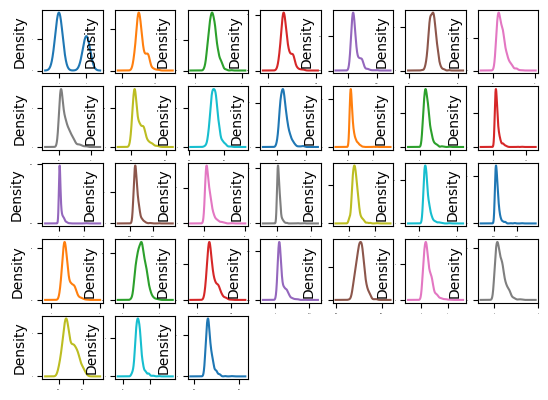

In [67]:
data.plot(kind='kde' , subplots=True , layout = (5,7) , sharex=False , legend = False , fontsize = 1)

plt.show()

It is good to check the `correlations between the attributes`. 

- From the output graph below:
    - The `red` around the diagonal suggests that attributes are `correlated with each other`. 
    - The `yellow` and `green` patches suggest some `moderate correlation`  
    - The `blue` boxes show `negative correlations`.



In [85]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]


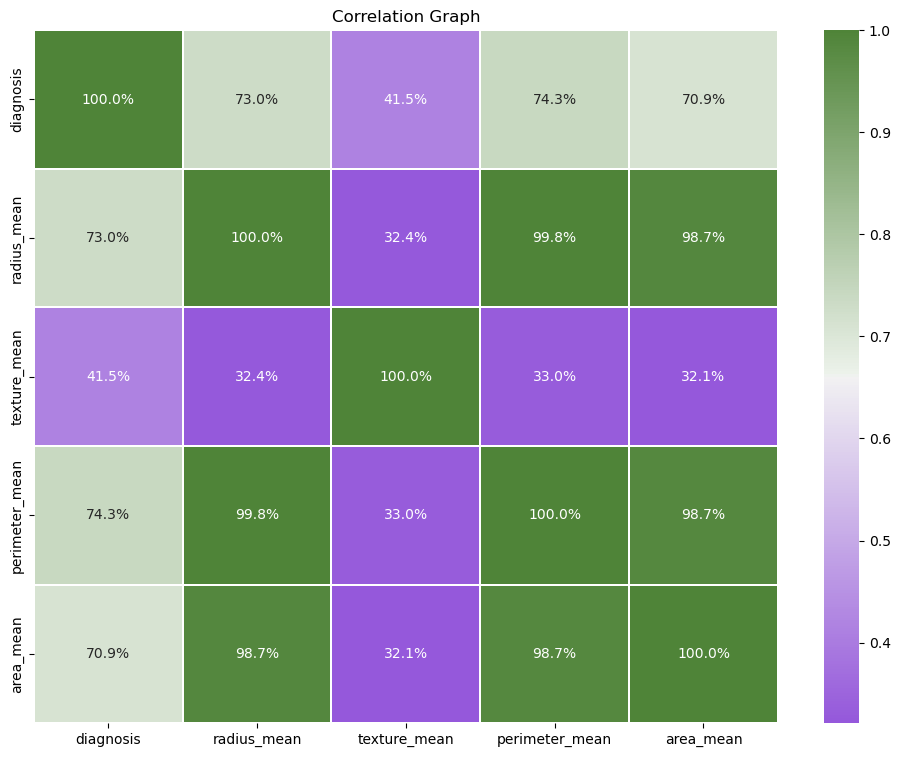

In [83]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(data[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

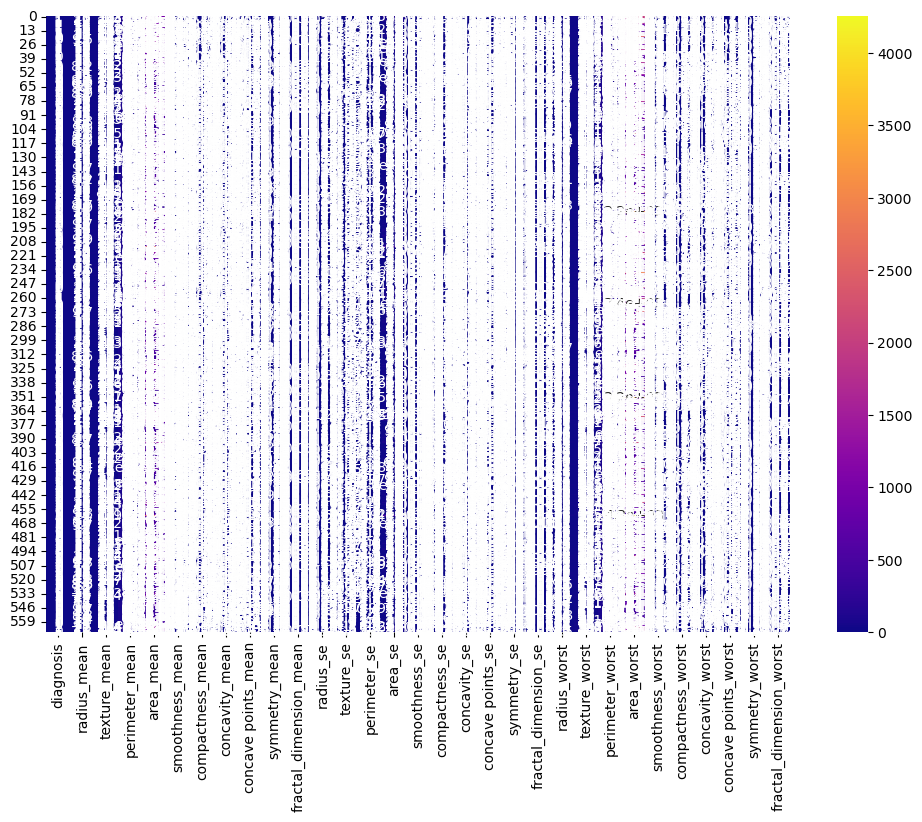

In [72]:
plt.figure(figsize=(12, 8))
sns.heatmap(data , annot = True , cmap = 'plasma' , cbar=True )
plt.show()

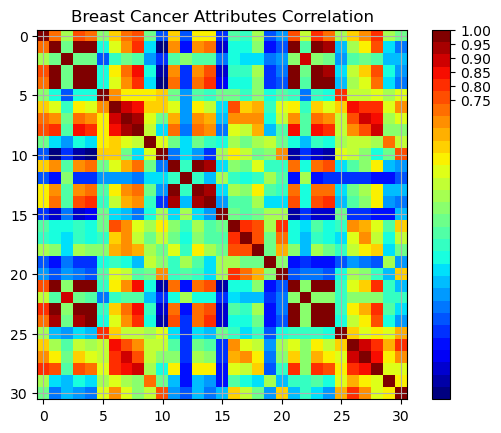

In [74]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(data.corr(), interpolation="none", cmap=cmap )
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

Text(0.5, 0, 'Diagnosis')

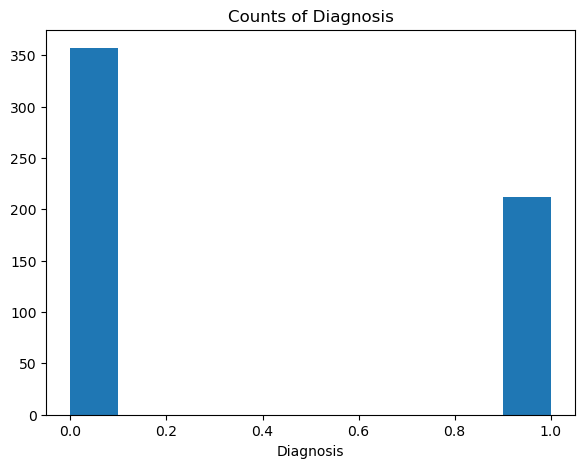

In [79]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist( data.diagnosis)
# plt.legend()
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")



In [80]:
px.histogram(data, x='diagnosis')


In [ ]:
data.corr()

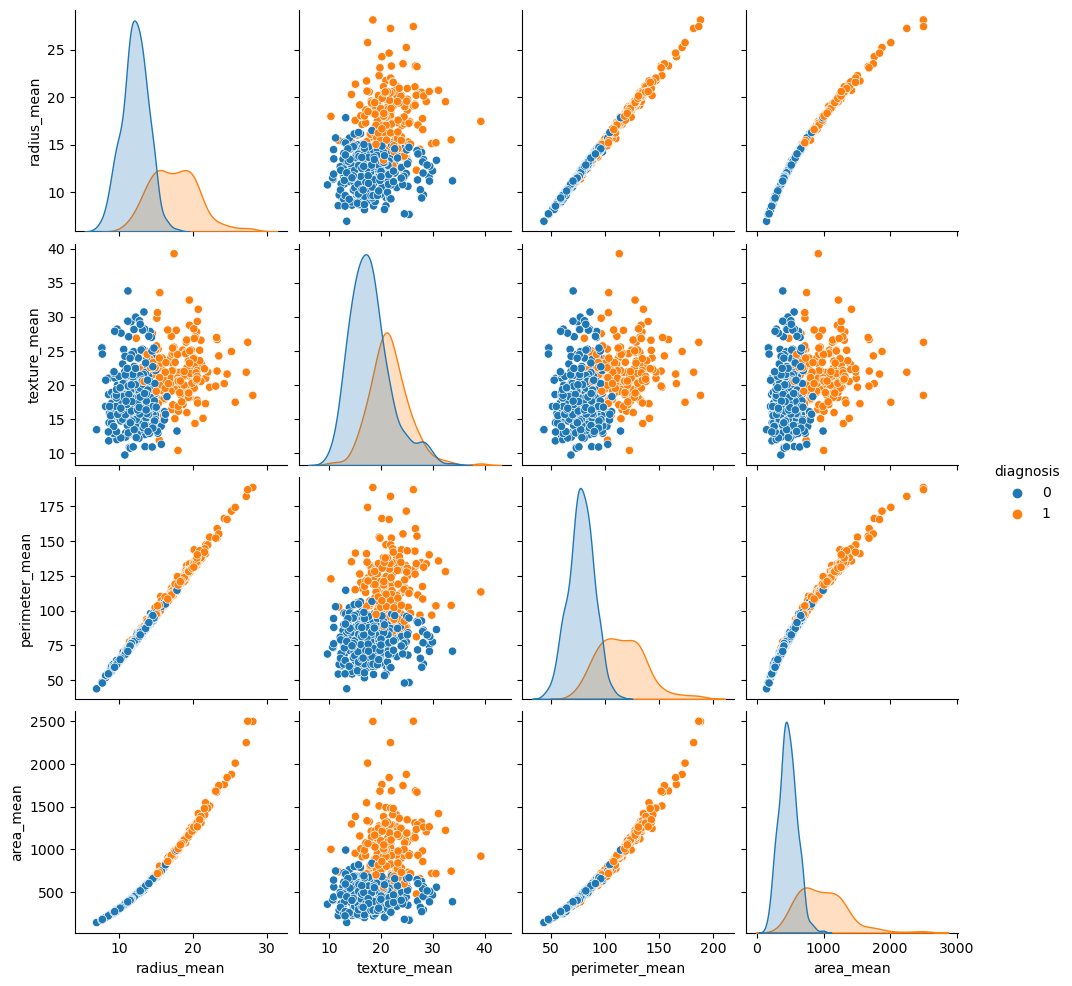

In [84]:
sns.pairplot(data[cols], hue="diagnosis")
plt.show()

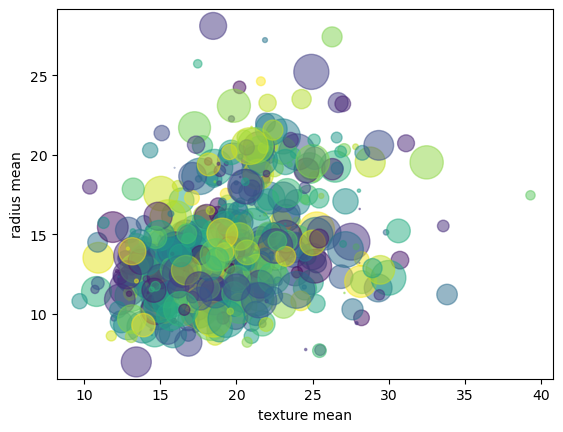

In [82]:
size = len(data['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(data['texture_mean'], data['radius_mean'], s=area, c=colors, alpha=0.5);

#### Finally, we'll split the data into predictor variables and target variable, following by breaking them into train and test sets. We will use 20% of the data as test set.



In [96]:
y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1)

## Train Test Split

In [97]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

## Perform Feature Standerd Scalling

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

`z = (x - u) / s`


In [98]:
# Scale the data to keep all the values in the same magnitude of 0 -1 

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Model Selecting and Model PredPrediction


#### Model Building

- Now, we are ready to build our model for prediction, for the I made function for model building and preforming prediction and measure it's prediction and accuracy score.



In [102]:
def model_building(model, X_train, X_test, y_train, y_test):
    """
    
    Model Fitting, Prediction And Other stuff
    return ('score', 'accuracy_score', 'predictions' )
    """
    
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
    
    return (score, accuracy, predictions)    


Let's make a dictionary for multiple models for bulk predictions



In [107]:
models_list = {
    "LogisticRegression" :  LogisticRegression(),
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=15, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
    "SVC" :  SVC(),
}

Before, sending it to the prediction check the key and values to store it's values in DataFrame below.



In [110]:
print(list(models_list.keys()))
print(list(models_list.values()))

['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC']
[LogisticRegression(), RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=5), DecisionTreeClassifier(criterion='entropy', random_state=0), SVC()]


## Model Implementing
Now, Train the model one by one and show the classification report of perticular models wise.



In [113]:
def Consufion_Metrics(cm):
    
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()

In [114]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

In [115]:
for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    print("\n\nClassification Report of '"+ str(name), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))




Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy            

In [117]:
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)


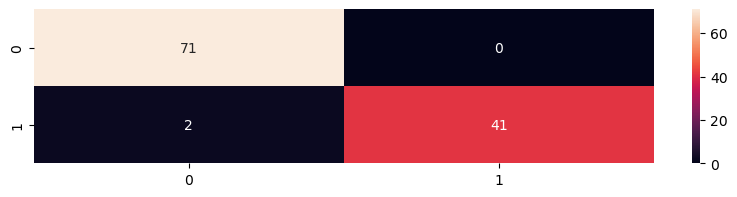

************************************************************


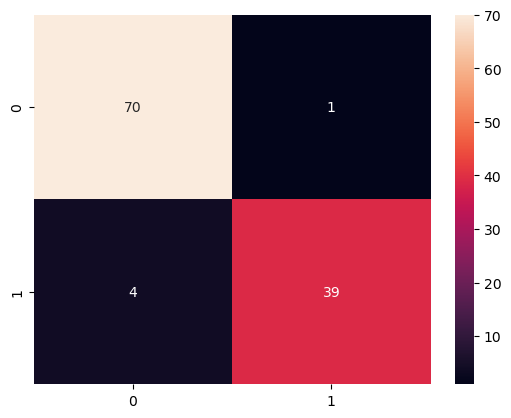

************************************************************


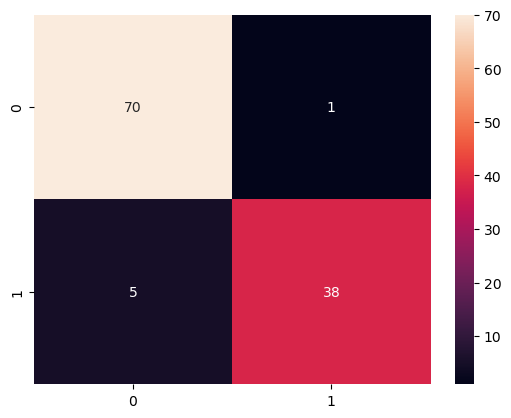

************************************************************


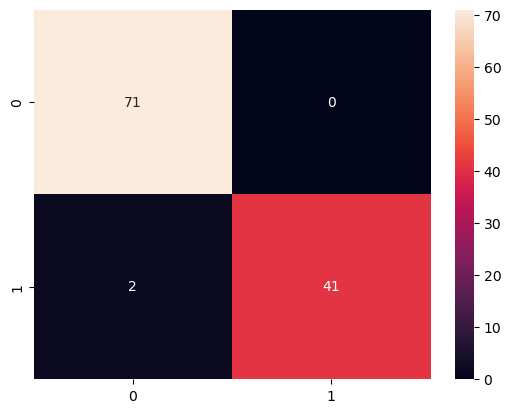

************************************************************


<Figure size 640x480 with 0 Axes>

In [122]:
plt.figure(figsize=(10, 2))
# plt.title("Confusion Metric Graph")


for index, cm in enumerate(confusion_matrixs):
    plt.xlabel("Negative Positive")
    plt.ylabel("True Positive")
    # Show The Metrics Graph    
    Consufion_Metrics(cm) # Call the Confusion Metrics Graph
    plt.tight_layout(pad=True)
    print(60*'*')

In [123]:
df_pred

model_name     score  accuracy_score accuracy_percentage
0      LogisticRegression  0.986813        0.982456              98.25%
1  RandomForestClassifier  1.000000        0.956140              95.61%
2  DecisionTreeClassifier  1.000000        0.947368              94.74%
3                     SVC  0.989011        0.982456              98.25%

In [124]:
df_pred.sort_values('score', ascending=False)


model_name     score  accuracy_score accuracy_percentage
1  RandomForestClassifier  1.000000        0.956140              95.61%
2  DecisionTreeClassifier  1.000000        0.947368              94.74%
3                     SVC  0.989011        0.982456              98.25%
0      LogisticRegression  0.986813        0.982456              98.25%

## K-Fold Validation

In [126]:
len(data)

569

In [127]:
# Sample For testing only

cv_score = cross_validate(LogisticRegression(), X, y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

pd.DataFrame(cv_score).describe().T

count      mean       std       min       25%  \
fit_time                        3.0  0.012041  0.000587  0.011550  0.011715   
score_time                      3.0  0.001616  0.001050  0.001009  0.001010   
test_r2                         3.0  0.759258  0.091648  0.705042  0.706350   
train_r2                        3.0  0.800708  0.036704  0.774122  0.779769   
test_neg_mean_squared_error     3.0 -0.056261  0.021376 -0.068783 -0.068602   
train_neg_mean_squared_error    3.0 -0.046581  0.008537 -0.052770 -0.051451   

                                   50%       75%       max  
fit_time                      0.011881  0.012286  0.012692  
score_time                    0.001011  0.001920  0.002828  
test_r2                       0.707658  0.786365  0.865073  
train_r2                      0.785416  0.814001  0.842585  
test_neg_mean_squared_error  -0.068421 -0.050000 -0.031579  
train_neg_mean_squared_error -0.050132 -0.043487 -0.036842

In [136]:
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']

targeted_feature = 'diagnosis'

#### Let's define a functino for cross validation scorring for multiple ML models



In [140]:
def cross_val_scoring(model):
    model.fit(data[prediction_feature], data[targeted_feature])
        
    predictions = model.predict(data[prediction_feature])    
    accuracy = accuracy_score(predictions, data[targeted_feature])
    print("\nFull-Data Accuracy:", round(accuracy, 2))
    print("Cross Validation Score of'"+ str(name), "'\n")
    
    
    # Initialize K folds.
    kFold = KFold(n_splits=5) # define 5 diffrent data folds
    
    err = []
    
    for train_index, test_index in kFold.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)

        # Data Spliting via fold indexes
        X_train = data[prediction_feature].iloc[train_index, :] # train_index = rows and all columns for Prediction_features
        y_train = data[targeted_feature].iloc[train_index] # all targeted features trains
        
        X_test = data[prediction_feature].iloc[test_index, :] # testing all rows and cols
        y_test = data[targeted_feature].iloc[test_index] # all targeted tests
        
        # Again Model Fitting
        model.fit(X_train, y_train)

        err.append(model.score(X_train, y_train))
        
        print("Score:", round(np.mean(err),  2) )

#### Call the function to know the cross validation function by mean for our select model predictions.



In [141]:
for name, model in zip(list(models_list.keys()), list(models_list.values())):
    cross_val_scoring(model)


Full-Data Accuracy: 0.9
Cross Validation Score of'LogisticRegression '

Score: 0.91
Score: 0.91
Score: 0.9
Score: 0.9
Score: 0.9

Full-Data Accuracy: 1.0
Cross Validation Score of'RandomForestClassifier '

Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0

Full-Data Accuracy: 1.0
Cross Validation Score of'DecisionTreeClassifier '

Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0

Full-Data Accuracy: 0.89
Cross Validation Score of'SVC '

Score: 0.9
Score: 0.89
Score: 0.88
Score: 0.88
Score: 0.88


### Some of the model are giving prefect scorring. it means sometimes overfitting occurs


## HyperTunning 

In [144]:
from  sklearn.model_selection import GridSearchCV


For HyperTunning we can use GridSearchCV to know the best performing parameters

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.



In [146]:
# Let's Implement Grid Search Algorithm

# Pick the model
model = DecisionTreeClassifier()

# Tunning Params
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }

In [147]:
# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # For 10 Cross-Validation

gsc.fit(X_train, y_train) # Model Fitting

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9494685990338164

 Best Estinator is 
DecisionTreeClassifier(max_features='auto', min_samples_leaf=4,
                       min_samples_split=9)

 Best Parametes are
{'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 9}


### Observation
Using this Algorithm, we can see that

- The best score is increases
- know the best estimator parametes for final model
- get the best parametes for it.

### Let's apply same criteria for K Neighbors Classification


In [150]:
# Pick the model
model = KNeighborsClassifier()


# Tunning Params
param_grid = {
    'n_neighbors': list(range(1, 30)),
    'leaf_size': list(range(1,30)),
    'weights': [ 'distance', 'uniform' ]
}


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10)

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.971304347826087

 Best Estinator is 
KNeighborsClassifier(leaf_size=1, n_neighbors=7, weights='distance')

 Best Parametes are
{'leaf_size': 1, 'n_neighbors': 7, 'weights': 'distance'}


### Observation
Using this Algorithm, we can see that

- A little score improved compared to previous model
- Showing the Best Estimator Parametes for final model
- We can see the Best Parametes for KNN Model.

### Finally, Implement same strategy for SVM


In [153]:
model = SVC()


# Tunning Params
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              }
]


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9736231884057972

 Best Estinator is 
SVC(C=1000, gamma=0.0001)

 Best Parametes are
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


### Observation
Using this Algorithm, we can see that

- It's gives slight better score
- Showing the Best Estimator Parametes for final model

### Let's Implementing RandomForestClassifier for hyper Tunning



In [154]:
model = RandomForestClassifier()


# Tunning Params
random_grid = {'bootstrap': [True, False],
 'max_depth': [40, 50, None], # 10, 20, 30, 60, 70, 100,
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2], # , 4
 'min_samples_split': [2, 5], # , 10
 'n_estimators': [200, 400]} # , 600, 800, 1000, 1200, 1400, 1600, 1800, 2000

# Implement GridSearchCV
gsc = GridSearchCV(model, random_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9692753623188406

 Best Estinator is 
RandomForestClassifier(bootstrap=False, max_depth=40, min_samples_leaf=2,
                       n_estimators=200)

 Best Parametes are
{'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


### Observation
Using this Algorithm, we can see that

- It's gives slight better score
- Showing the Best Estimator Parametes for final model


## Depoly the Model

- Finally, we are done so far. The last step is to deploy our model in production map. So we need to export our model and bind with web application API.

- Using pickle we can export our model and store in to model.pkl file, so we can ealy access this file and calculate customize prediction using Web App API.

A little bit information about pickle:
- Pickle is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions



In [ ]:
# model.fit(X_train, Y_train)
# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))


# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [155]:
import pickle as pkl

# Trainned Model 
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

filename = 'logistic_model.pkl'
pkl.dump(logistic_model, open(filename, 'wb')) 

### We can check your current directory. You can see the file with named "logistic_model.pkl"¶



In [157]:
# load the model from disk
loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
result = loaded_model.score(X_test, y_test)

In [158]:
result

0.9824561403508771